# Analysis of Global Nucleosome Positioning in *Arabidopsis thaliana*
**Author**: Emma Tung Corcoran </br>
**Date Last Modified**: October 27, 2021 </br>

In [1]:
#Load required dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import os
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel
import statistics

In [2]:
#Set path to save plot
save_path = "/Users/emmacorcoran/Documents/Jupyter Code/2021_05_24_MNase"

## Load and Clean Data
First, I load the data generated using deeptools and clean by removing empty columns, adding columns corresponding to gene names, and subsectioning data by sample. I also take a look at the metaprofiles by plotting the sum over all genes.

In [3]:
#Load data matrices
#Profile values at each gene
base_path = "/Users/emmacorcoran/Documents/NGS Data/MNase_2021_05_24/deeptools/1500 downstream"
filename = "mnase-reps-proteincoding-1500.tab"
path_to_file = os.path.join(base_path, filename)
data_matrix = pd.read_csv(path_to_file, skiprows=2, sep='\t')

In [4]:
data_matrix.head()

,MNase-1-140-160.mnase-fcnorm,MNase-1-140-160.mnase-fcnorm.1,MNase-1-140-160.mnase-fcnorm.2,MNase-1-140-160.mnase-fcnorm.3,MNase-1-140-160.mnase-fcnorm.4,MNase-1-140-160.mnase-fcnorm.5,MNase-1-140-160.mnase-fcnorm.6,MNase-1-140-160.mnase-fcnorm.7,MNase-1-140-160.mnase-fcnorm.8,MNase-1-140-160.mnase-fcnorm.9,...,MNase-8-140-160.mnase-fcnorm.240,MNase-8-140-160.mnase-fcnorm.241,MNase-8-140-160.mnase-fcnorm.242,MNase-8-140-160.mnase-fcnorm.243,MNase-8-140-160.mnase-fcnorm.244,MNase-8-140-160.mnase-fcnorm.245,MNase-8-140-160.mnase-fcnorm.246,MNase-8-140-160.mnase-fcnorm.247,MNase-8-140-160.mnase-fcnorm.248,MNase-8-140-160.mnase-fcnorm.249
0,0.04216,0.06793,0.068600,0.088340,0.09503,0.09202,0.11540,0.07998,0.06458,0.05387,...,0.036720,0.063600,0.075070,0.078680,0.08294,0.07278,0.05639,0.061300,0.04426,0.024260
1,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.013440,0.016060,0.027870,0.038360,0.02918,0.03311,0.02459,0.013110,0.01311,0.003278
2,0.01840,0.01104,0.006693,0.006693,0.01372,0.01338,0.02242,0.05521,0.05555,0.05387,...,0.099330,0.084250,0.047860,0.044580,0.03114,0.01967,0.01508,0.006229,0.01737,0.029500
3,0.04685,0.05822,0.101100,0.104100,0.08031,0.06893,0.02610,0.02008,0.01338,0.02075,...,0.006557,0.006557,0.004917,0.002295,0.02852,0.03934,0.03934,0.041630,0.03508,0.040320
4,0.07931,0.06191,0.038150,0.053210,0.05889,0.07194,0.08633,0.07998,0.07462,0.05622,...,0.033770,0.057040,0.039340,0.042950,0.05606,0.03377,0.03475,0.032460,0.02590,0.032780


In [5]:
#Matrix containing gene names corresponding to each row of data_matrix
filename = "mnase-reps-proteincoding-1500.bed"
path_to_file = os.path.join(base_path, filename)
sorted_genes = pd.read_csv(path_to_file, sep='\t')
#Make dataframe containing gene names and relabel gene naming convention to correspond with RNA-seq data
gene_names = sorted_genes['name'].copy()
gene_num = len(gene_names)
for i in range(gene_num):
    newname = gene_names[i]
    if newname[0:2] == 'AT':
        gene_names[i] = newname[0:-2]

In [6]:
#Make metadata matrix (has profile values and gene names)
metadata = data_matrix.copy()
metadata['gene name'] = gene_names

In [7]:
metadata.head()

,MNase-1-140-160.mnase-fcnorm,MNase-1-140-160.mnase-fcnorm.1,MNase-1-140-160.mnase-fcnorm.2,MNase-1-140-160.mnase-fcnorm.3,MNase-1-140-160.mnase-fcnorm.4,MNase-1-140-160.mnase-fcnorm.5,MNase-1-140-160.mnase-fcnorm.6,MNase-1-140-160.mnase-fcnorm.7,MNase-1-140-160.mnase-fcnorm.8,MNase-1-140-160.mnase-fcnorm.9,...,MNase-8-140-160.mnase-fcnorm.241,MNase-8-140-160.mnase-fcnorm.242,MNase-8-140-160.mnase-fcnorm.243,MNase-8-140-160.mnase-fcnorm.244,MNase-8-140-160.mnase-fcnorm.245,MNase-8-140-160.mnase-fcnorm.246,MNase-8-140-160.mnase-fcnorm.247,MNase-8-140-160.mnase-fcnorm.248,MNase-8-140-160.mnase-fcnorm.249,gene name
0,0.04216,0.06793,0.068600,0.088340,0.09503,0.09202,0.11540,0.07998,0.06458,0.05387,...,0.063600,0.075070,0.078680,0.08294,0.07278,0.05639,0.061300,0.04426,0.024260,AT1G01010
1,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.016060,0.027870,0.038360,0.02918,0.03311,0.02459,0.013110,0.01311,0.003278,AT1G01020
2,0.01840,0.01104,0.006693,0.006693,0.01372,0.01338,0.02242,0.05521,0.05555,0.05387,...,0.084250,0.047860,0.044580,0.03114,0.01967,0.01508,0.006229,0.01737,0.029500,AT1G01030
3,0.04685,0.05822,0.101100,0.104100,0.08031,0.06893,0.02610,0.02008,0.01338,0.02075,...,0.006557,0.004917,0.002295,0.02852,0.03934,0.03934,0.041630,0.03508,0.040320,AT1G01040
4,0.07931,0.06191,0.038150,0.053210,0.05889,0.07194,0.08633,0.07998,0.07462,0.05622,...,0.057040,0.039340,0.042950,0.05606,0.03377,0.03475,0.032460,0.02590,0.032780,AT1G01050


## Plot Sum of All Genes

In [8]:
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 24})
plt.rcParams['lines.linewidth'] = 2.5

#Add cumulative sum of nucleosome occupancy over all genes and plot profile

#sum all rows
rowsum = data_matrix.sum(axis=0)/27443

#Split data by sample
CL1_data = rowsum[0:250].tolist()
CL2_data = rowsum[250:500].tolist()
CL3_data = rowsum[500:750].tolist()
CL4_data = rowsum[750:1000].tolist()
CL5_data = rowsum[1000:1250].tolist()
CL6_data = rowsum[1250:1500].tolist()
CL7_data = rowsum[1500:1750].tolist()
CL8_data = rowsum[1750:2000].tolist()

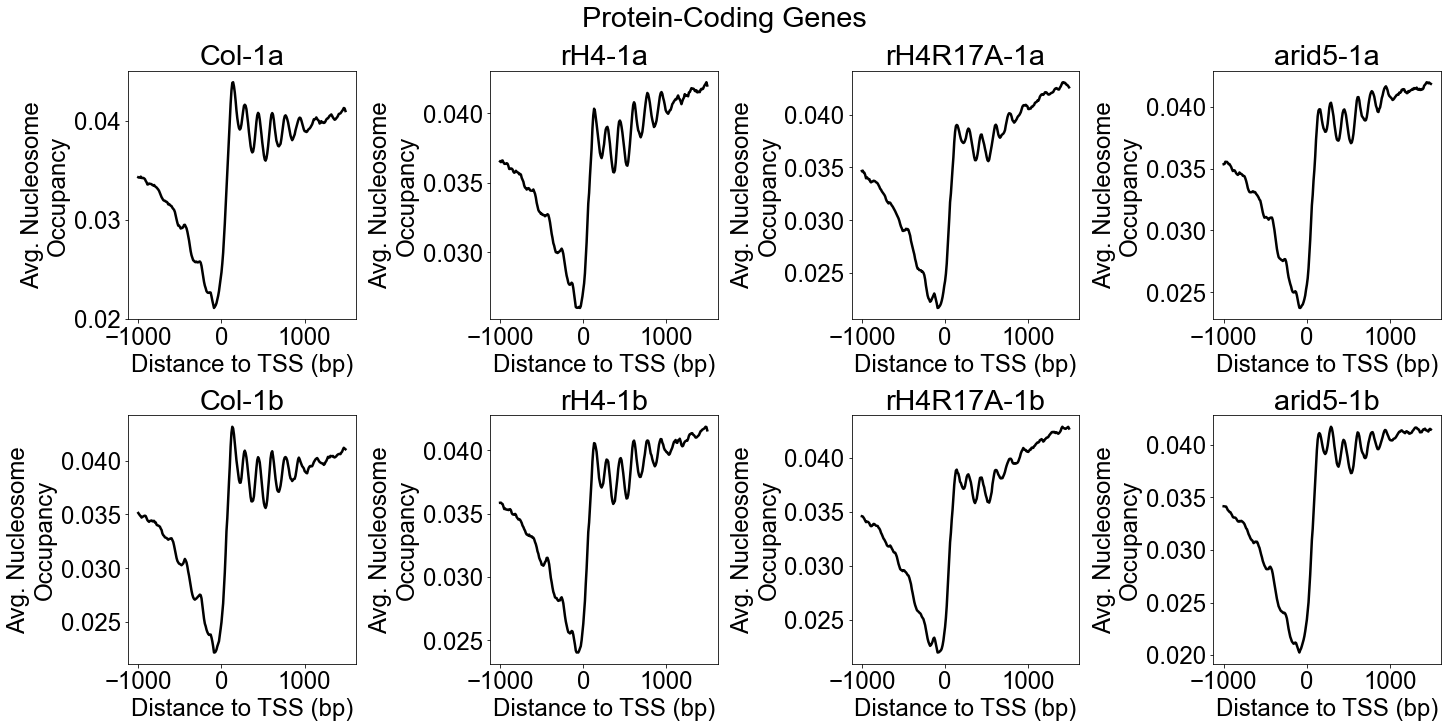

In [9]:
#Plot data
x_vals = np.arange(-1000,1500,10)
fig, axs = plt.subplots(2, 4, constrained_layout=True)
fig.set_size_inches(20, 10)
for ax in axs.flat:
    ax.set(xlabel='Distance to TSS (bp)', ylabel="Avg. Nucleosome" "\n" "Occupancy")
axs[0, 0].plot(x_vals, CL1_data, color="black")
axs[0, 0].set_title('Col-1a')

axs[1, 0].plot(x_vals, CL2_data, color="black")
axs[1, 0].set_title('Col-1b')

axs[0, 1].plot(x_vals, CL3_data, color="black")
axs[0, 1].set_title('rH4-1a')

axs[1, 1].plot(x_vals, CL4_data, color="black")
axs[1, 1].set_title('rH4-1b')

axs[0, 2].plot(x_vals, CL5_data, color="black")
axs[0, 2].set_title('rH4R17A-1a')

axs[1, 2].plot(x_vals, CL6_data, color="black")
axs[1, 2].set_title('rH4R17A-1b')

axs[0, 3].plot(x_vals, CL7_data, color="black")
axs[0, 3].set_title('arid5-1a')

axs[1, 3].plot(x_vals, CL8_data, color="black")
axs[1, 3].set_title('arid5-1b')

fig.suptitle('Protein-Coding Genes')
filename = "protein-coding_profiles/indiv_reps_1500down"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file)

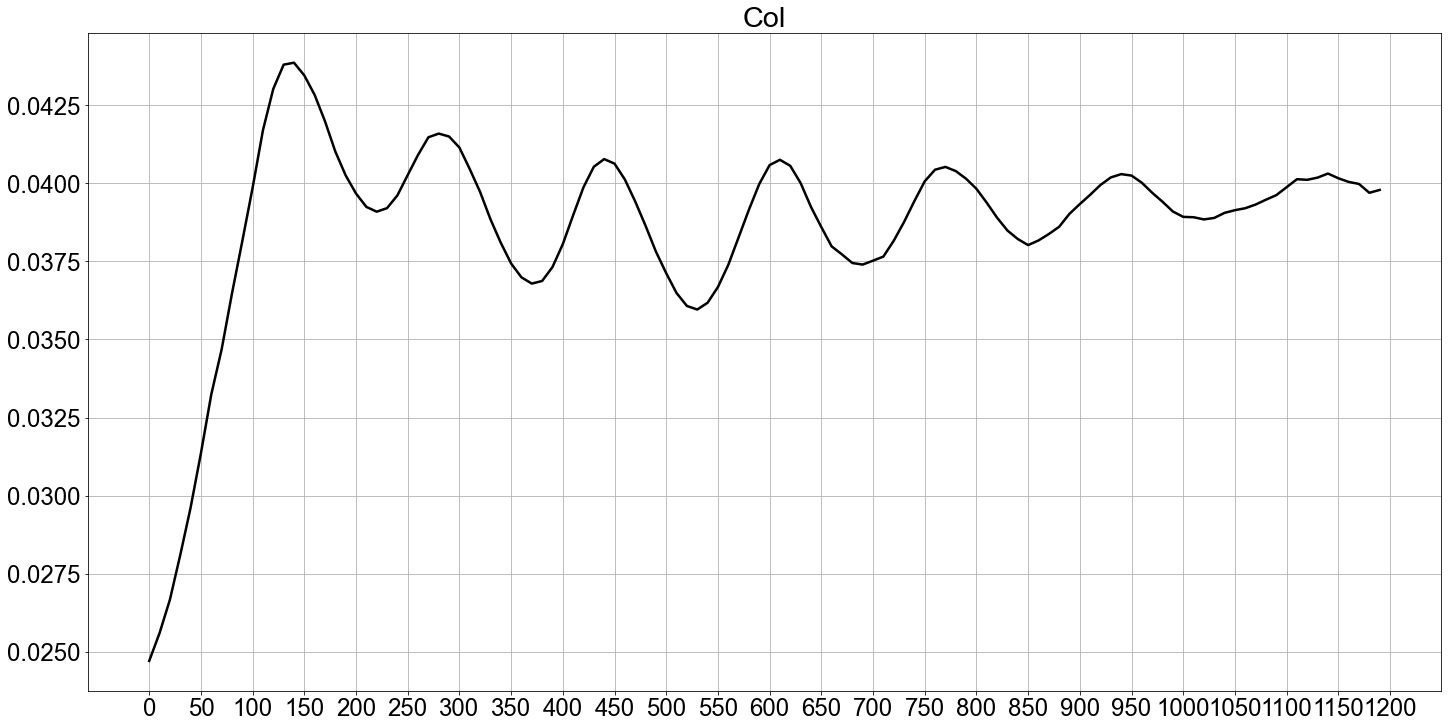

In [10]:
# Plot control sample with gridlines to visualize nucleosome peak coordinates
x_vals = np.arange(0,1200,10)
fig, ax = plt.subplots(1, 1, constrained_layout=True)
fig.set_size_inches(20, 10)
plt.plot(x_vals, CL1_data[100:220], color="black")
ax.set_title('Col')
plt.xticks(np.arange(0, 1250, 50))
ax.grid(True)

In [11]:
# Obtain minimum and maximum from each +1 through +6 nucleosomes and the minimum for 5' NFR

#Function to calculate maximum or minimum for range
def get_max(data, tss_start, start, end, maxmin=True):
    if maxmin==True:
        return max(data[tss_start+start:tss_start+end])
    else:
        return min(data[tss_start+start:tss_start+end])

In [12]:
# Function to obtain minima and maxima from +1 through +6 nucleosomes and calculate peak height
def calc_peaks(nuc_data):
    # Nucleosome maxima and minima are spaced approximately 150 bp apart
    # Each coordinate is 10 bp bin
    #+1 nucleosome max: 75 to 175
    #+1 nucleosome min: 175 to 275
    #+2 nucleosome max: 250 to 350
    #+2 nucleosome min: 300 to 400
    #+3 nucleosome max: 400 to 500
    #+3 nucleosome min: 475 to 575
    #+4 nucleosome max: 550 to 650
    #+4 nucleosome min: 625 to 725
    #+5 nucleosome max: 725 to 825
    #+5 nucleosome min: 800 to 900
    #+6 nucleosome max: 900 to 1000
    #+6 nucleosome min: 975 to 1075

    # Set TSS start coordinate to 100
    tss_start = 100
    
    # Get minimum of 5' NFR
    nfr_min = min(nuc_data)
    
    # Calculate all maxima and minima
    nuc1_max = get_max(nuc_data, tss_start, 7, 18, True)
    nuc1_min = get_max(nuc_data, tss_start, 17, 28, False)
    nuc2_max = get_max(nuc_data, tss_start, 25, 35, True)
    nuc2_min = get_max(nuc_data, tss_start, 30, 40, False)
    nuc3_max = get_max(nuc_data, tss_start, 40, 50, True)
    nuc3_min = get_max(nuc_data, tss_start, 47, 58, False)
    nuc4_max = get_max(nuc_data, tss_start, 55, 65, True)
    nuc4_min = get_max(nuc_data, tss_start, 62, 73, False)
    nuc5_max = get_max(nuc_data, tss_start, 72, 83, True)
    nuc5_min = get_max(nuc_data, tss_start, 80, 90, False)
    nuc6_max = get_max(nuc_data, tss_start, 90, 100, True)
    nuc6_min = get_max(nuc_data, tss_start, 97, 108, False)
    
    # Calculate peak heights
    peak1_height = nuc1_max-statistics.mean([nfr_min,nuc1_min])
    #peak1_height = nuc1_max-statistics.mean([nuc1_min,nuc1_min])
    peak2_height = nuc2_max-statistics.mean([nuc1_min,nuc2_min])
    peak3_height = nuc3_max-statistics.mean([nuc2_min,nuc3_min])
    peak4_height = nuc4_max-statistics.mean([nuc3_min,nuc4_min])
    peak5_height = nuc5_max-statistics.mean([nuc4_min,nuc5_min])
    peak6_height = nuc6_max-statistics.mean([nuc5_min,nuc6_min])
    
    # Return peak heights
    return [peak1_height, peak2_height, peak3_height, peak4_height, peak5_height, peak6_height]

In [13]:
peak_data = []

# Calculate peak data for each sample and append to list
peak_data.append(calc_peaks(CL1_data))
peak_data.append(calc_peaks(CL2_data))
peak_data.append(calc_peaks(CL3_data))
peak_data.append(calc_peaks(CL4_data))
peak_data.append(calc_peaks(CL5_data))
peak_data.append(calc_peaks(CL6_data))
peak_data.append(calc_peaks(CL7_data))
peak_data.append(calc_peaks(CL8_data))

# Initialize peak data frame
colnames = ['Col-1a', 'Col-1b', 'rH4-1a', 'rH4-1b', 'rH4R17A-1a', 'rH4R17A-1b', 'arid5-1a', 'arid5-1b']
peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames)
peak_df.head()

,Col-1a,Col-1b,rH4-1a,rH4-1b,rH4R17A-1a,rH4R17A-1b,arid5-1a,arid5-1b
0,0.013760,0.013090,0.008947,0.010010,0.009547,0.009356,0.008965,0.011435
1,0.003652,0.003849,0.002764,0.002855,0.002189,0.002003,0.002714,0.003199
2,0.004402,0.004414,0.003495,0.003403,0.002484,0.002338,0.002632,0.002864
3,0.004075,0.004523,0.003547,0.003721,0.002348,0.001904,0.002816,0.003167
4,0.002815,0.002733,0.002824,0.002460,0.001608,0.001141,0.002033,0.002050


In [14]:
# Plot nucleosome peak heights
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 20})

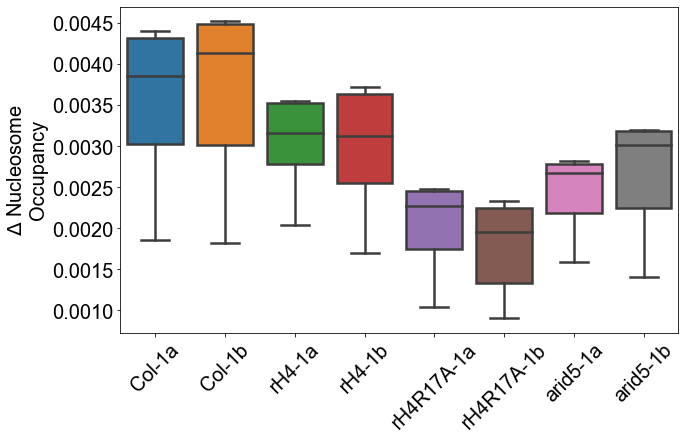

In [15]:
# Plot boxplot
ax = sns.boxplot(x="variable", y="value", data=pd.melt(peak_df), showfliers = False)
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/replicates_nonorm_boxplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

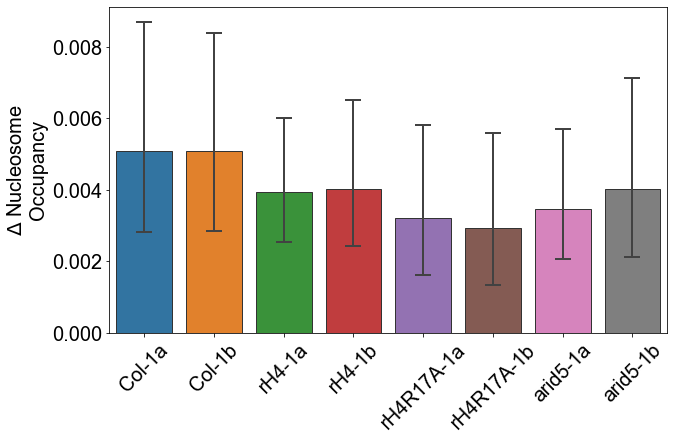

In [16]:
# Plot bar plot with means and standard deviation
ax = sns.barplot(x="variable", y="value", data=pd.melt(peak_df), errwidth=2, capsize=.2, edgecolor=".2")
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/replicates_nonorm_barplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

## T-test

In [17]:
# Paired t-test
print("Col-1a vs Col-1b:", ttest_rel(peak_df['Col-1a'], peak_df['Col-1b']))
print("Col-1a vs rH4-1a:", ttest_rel(peak_df['Col-1a'], peak_df['rH4-1a']))
print("Col-1a vs rH4-1b:", ttest_rel(peak_df['Col-1a'], peak_df['rH4-1b']))
print("Col-1a vs rH4R17A-1a:", ttest_rel(peak_df['Col-1a'], peak_df['rH4R17A-1a']))
print("Col-1a vs rH4R17A-1b:", ttest_rel(peak_df['Col-1a'], peak_df['rH4R17A-1b']))
print("Col-1a vs arid5-1a:", ttest_rel(peak_df['Col-1a'], peak_df['arid5-1a']))
print("Col-1a vs arid5-1b:", ttest_rel(peak_df['Col-1a'], peak_df['arid5-1b']))
print("rH4R17A-1a vs rH4-1a:", ttest_rel(peak_df['rH4R17A-1a'], peak_df['rH4-1a']))

Col-1a vs Col-1b: Ttest_relResult(statistic=0.1487381184296621, pvalue=0.8875730354789447)
Col-1a vs rH4-1a: Ttest_relResult(statistic=1.53653298264514, pvalue=0.18500952252448138)
Col-1a vs rH4-1b: Ttest_relResult(statistic=1.9438884182047038, pvalue=0.10952399186017943)
Col-1a vs rH4R17A-1a: Ttest_relResult(statistic=3.8506212898346353, pvalue=0.011993565226104053)
Col-1a vs rH4R17A-1b: Ttest_relResult(statistic=4.455788300326583, pvalue=0.006666439541470687)
Col-1a vs arid5-1a: Ttest_relResult(statistic=2.4614263812399546, pvalue=0.05712842877398268)
Col-1a vs arid5-1b: Ttest_relResult(statistic=3.588499176347333, pvalue=0.01573296780196571)
rH4R17A-1a vs rH4-1a: Ttest_relResult(statistic=-2.5912194654688374, pvalue=0.04876480628614814)


## Combine biological replicates into one data frame (12 nucleosome peaks total)

In [18]:
comb_data = []

# Combine peak data for biological replicates
comb_data.append(peak_df['Col-1a'].append(peak_df['Col-1b']))
comb_data.append(peak_df['rH4-1a'].append(peak_df['rH4-1b']))
comb_data.append(peak_df['rH4R17A-1a'].append(peak_df['rH4R17A-1b']))
comb_data.append(peak_df['arid5-1a'].append(peak_df['arid5-1b']))

# Initialize peak data frame
colnames_merge = ['Col', 'rH4', 'rH4R17A', 'arid5']
comb_df = pd.DataFrame(np.array(comb_data).T.tolist(), columns=colnames_merge)
comb_df.head()

,Col,rH4,rH4R17A,arid5
0,0.013760,0.008947,0.009547,0.008965
1,0.003652,0.002764,0.002189,0.002714
2,0.004402,0.003495,0.002484,0.002632
3,0.004075,0.003547,0.002348,0.002816
4,0.002815,0.002824,0.001608,0.002033


In [ ]:
# Plot boxplot
ax = sns.boxplot(x="variable", y="value", data=pd.melt(comb_df), showfliers = False)
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/replicates_together_boxplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

In [ ]:
# Plot bar plot with means and standard deviation
ax = sns.barplot(x="variable", y="value", data=pd.melt(comb_df), errwidth=2, capsize=.2, edgecolor=".2")
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/replicates_together_barplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

## T-test

In [ ]:
# Paired t-test
print("Col vs rH4:", ttest_rel(comb_df['Col'], comb_df['rH4']))
print("Col vs rH4R17A:", ttest_rel(comb_df['Col'], comb_df['rH4R17A']))
print("Col vs arid5:", ttest_rel(comb_df['Col'], comb_df['arid5']))
print("rH4R17A vs rH4:", ttest_rel(comb_df['rH4R17A'], comb_df['rH4']))

## Merged data
Calculate plots for merged MNase-seq replicates

In [ ]:
#Load data matrices
#Profile values at each gene
base_path = "/Users/emmacorcoran/Documents/NGS Data/MNase_2021_05_24/deeptools/1500 downstream"
filename = "mnase-merged-proteincoding-1500.tab"
path_to_file = os.path.join(base_path, filename)
data_matrix = pd.read_csv(path_to_file, skiprows=2, sep='\t')

In [ ]:
data_matrix.head()

In [ ]:
#Matrix containing gene names corresponding to each row of data_matrix
filename = "mnase-merged-proteincoding-1500.bed"
path_to_file = os.path.join(base_path, filename)
sorted_genes = pd.read_csv(path_to_file, sep='\t')
#Make dataframe containing gene names and relabel gene naming convention to correspond with RNA-seq data
gene_names = sorted_genes['name'].copy()
gene_num = len(gene_names)
for i in range(gene_num):
    newname = gene_names[i]
    if newname[0:2] == 'AT':
        gene_names[i] = newname[0:-2]

In [ ]:
#Make metadata matrix (has profile values and gene names)
metadata = data_matrix.copy()
metadata['gene name'] = gene_names

In [ ]:
metadata.head()

## Plot Sum of All Genes

In [ ]:
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 24})
plt.rcParams['lines.linewidth'] = 2.5

#Add cumulative sum of nucleosome occupancy over all genes and plot profile

#sum all rows
rowsum = data_matrix.sum(axis=0)/27443

#Split data by sample
Col_data = rowsum[0:250].tolist()
rH4_data = rowsum[250:500].tolist()
R17A_data = rowsum[500:750].tolist()
arid5_data = rowsum[750:1000].tolist()

In [ ]:
#Plot data
x_vals = np.arange(-1000,1500,10)
fig, axs = plt.subplots(1, 4, constrained_layout=True)
fig.set_size_inches(20, 5)
for ax in axs.flat:
    ax.set(xlabel='Distance to TSS (bp)', ylabel="Avg. Nucleosome" "\n" "Occupancy")
axs[0].plot(x_vals, Col_data, color="black")
axs[0].set_title('Col')

axs[1].plot(x_vals, rH4_data, color="black")
axs[1].set_title('rH4')

axs[2].plot(x_vals, R17A_data, color="black")
axs[2].set_title('rH4R17A')

axs[3].plot(x_vals, arid5_data, color="black")
axs[3].set_title('arid5')

fig.suptitle('Protein-Coding Genes')
filename = "protein-coding_profiles/merged_reps_1500down"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file)

In [ ]:
# Plot control sample with gridlines to visualize nucleosome peak coordinates
x_vals = np.arange(0,1200,10)
fig, ax = plt.subplots(1, 1, constrained_layout=True)
fig.set_size_inches(20, 5)
plt.plot(x_vals, Col_data[100:220], color="black")
ax.set_title('Col')
plt.xticks(np.arange(0, 1250, 50))
ax.grid(True)

In [ ]:
peak_data = []

# Calculate peak data for each sample and append to list
peak_data.append(calc_peaks(Col_data))
peak_data.append(calc_peaks(rH4_data))
peak_data.append(calc_peaks(R17A_data))
peak_data.append(calc_peaks(arid5_data))

# Initialize peak data frame
peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames_merge)
peak_df.head()

In [ ]:
# Plot boxplot
ax = sns.boxplot(x="variable", y="value", data=pd.melt(peak_df), showfliers = False)
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/merged_nonorm_boxplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

In [ ]:
# Plot bar plot with means and standard deviation
ax = sns.barplot(x="variable", y="value", data=pd.melt(peak_df), errwidth=2, capsize=.2, edgecolor=".2")
plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
plt.xlabel("")
plt.xticks(rotation = 45)
filename = "peak_height/merged_nonorm_barplot"
path_to_file = os.path.join(save_path, filename)
plt.gcf().set_size_inches(10, 6)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

In [ ]:
# Paired t-test
print("Col vs rH4:", ttest_rel(peak_df['Col'], peak_df['rH4']))
print("Col vs rH4R17A:", ttest_rel(peak_df['Col'], peak_df['rH4R17A']))
print("Col vs arid5:", ttest_rel(peak_df['Col'], peak_df['arid5']))
print("rH4R17A vs rH4:", ttest_rel(peak_df['rH4R17A'], peak_df['rH4']))